In [9]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv(r'world_development_data_imputed.csv')
df
# Leer el csv y pasarlo a dataframe

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
0,2000.0,Afghanistan,Asia,Southern Asia,652860.0,19542982.0,29.963329,1.443803,1.801248e+10,-5.206288,...,1.778669e+10,41.312634,17.178775,37.611028,55.298000,52.777048,0.000000,129.3,-1007135.0,1.861377
1,2000.0,Malta,Europe,Southern Europe,320.0,390087.0,1219.021875,0.645267,4.323339e+09,19.681791,...,4.273280e+09,128.374581,26.939987,-4.512396,78.348780,135.682159,28.667475,7.6,1799.0,0.952299
2,2000.0,Belgium,Europe,Western Europe,30530.0,10251250.0,338.548547,0.242518,2.367925e+11,3.716679,...,2.654129e+11,69.682740,24.943833,2.014617,77.721951,154.515900,54.840339,5.9,32262.0,0.308431
3,2000.0,Marshall Islands,Oceania,Micronesia,180.0,54224.0,301.244444,0.721838,1.153475e+08,1.354079,...,1.500075e+08,100.812761,12.681072,-0.454689,63.275000,55.484514,0.824358,42.1,-1323.0,1.492787
4,2000.0,Mauritania,Africa,Sub-Saharan Africa,1030700.0,2695003.0,2.614731,2.799182,1.779521e+09,-3.918026,...,1.907497e+09,33.423259,29.951850,6.351587,61.028000,45.461676,0.567717,98.8,-2997.0,2.476860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,2021.0,Morocco,Africa,Northern Africa,446550.0,37076584.0,83.075474,1.051484,1.428666e+11,7.929668,...,1.364081e+11,42.020038,26.080984,3.244246,74.042000,65.709558,137.459274,18.0,-46242.0,1.886932
4440,2021.0,Montenegro,Europe,Southern Europe,13810.0,619211.0,46.037993,-0.337763,5.861431e+09,13.043464,...,5.800493e+09,62.195638,14.835495,4.726248,73.824390,59.217626,178.395786,2.3,-101.0,0.161803
4441,2021.0,Mongolia,Asia,Eastern Asia,1564116.0,3347782.0,2.149449,1.609371,1.528644e+10,1.636770,...,1.247452e+10,60.549214,37.075572,14.420065,70.975000,105.237048,140.012223,14.7,0.0,1.795620
4442,2021.0,Kenya,Africa,Sub-Saharan Africa,580370.0,53005614.0,93.132821,1.942761,1.097037e+11,7.590489,...,1.100273e+11,19.915101,17.152436,4.330748,61.427000,23.971853,122.790239,37.2,-52549.0,3.706017


In [10]:
##ANALISIS EN BASE A LOS PRIMEROS 10 DATOS DE LA TABLA##
# Conteo de Regiones
conteo_regiones = df['Region'].value_counts()
print(conteo_regiones)

Region
Africa      1166
Asia        1078
Europe       924
Americas     924
Oceania      352
Name: count, dtype: int64


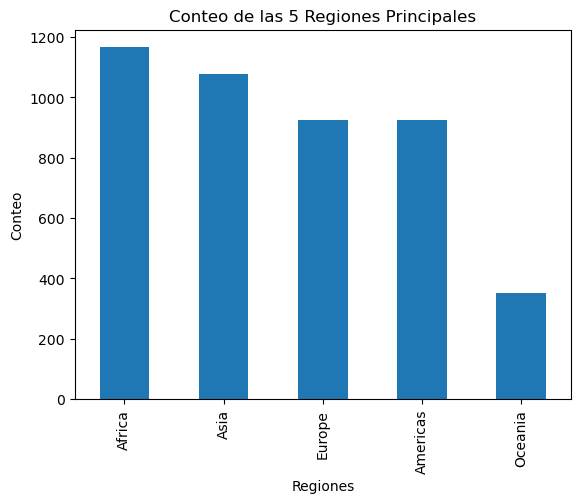

In [11]:
# Visualizar gráfico de barras de los primeros 5 datos del conteo de regiones
conteo_regiones.head(5).plot(kind='bar')
plt.title('Conteo de las 5 Regiones Principales')
plt.xlabel('Regiones')
plt.ylabel('Conteo')
plt.show()


In [16]:
# Agrupacion por región y calcular el promedio de la tasa de mortalidad infantil
grouped_data = df.groupby('Region')['MortRateU5'].mean()
print(grouped_data)


Region
Africa      83.747256
Americas    22.664798
Asia        29.697148
Europe       7.432407
Oceania     29.144586
Name: MortRateU5, dtype: float64


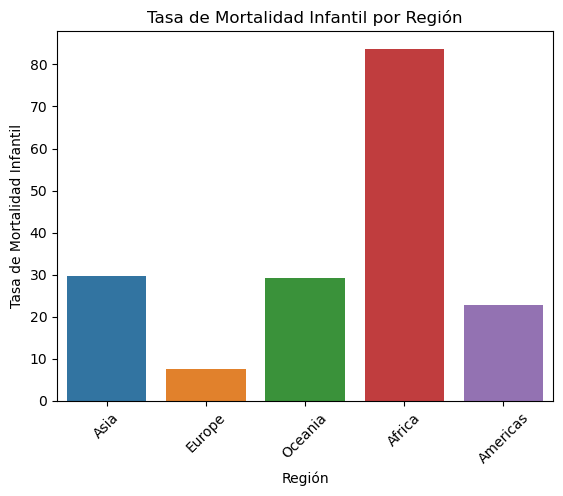

In [17]:
###Gráfico de barras relacionado con la tasa de mortalidad infantil por región
sns.barplot(x='Region', y='MortRateU5', data=df, errorbar=None)
plt.title('Tasa de Mortalidad Infantil por Región')
plt.xlabel('Región')
plt.ylabel('Tasa de Mortalidad Infantil')
plt.xticks(rotation=45)
plt.show()

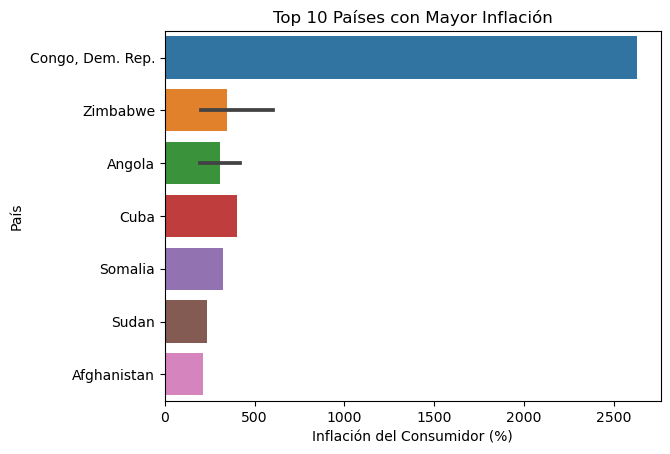

In [26]:
df_sorted_inflation = df.sort_values(by='InflConsPric%', ascending=False)
sns.barplot(x='InflConsPric%', y='Country', data=df_sorted_inflation.head(10))
plt.xlabel('Inflación del Consumidor (%)')
plt.ylabel('País')
plt.title('Top 10 Países con Mayor Inflación')
plt.show()


In [27]:
pais_max_inflacion = df_sorted_inflation.iloc[0]['Country']
max_inflacion = df_sorted_inflation.iloc[0]['InflConsPric%']
print(f"El país con la inflación más alta es {pais_max_inflacion} con {max_inflacion}%.")


El país con la inflación más alta es Congo, Dem. Rep. con 2630.1226744224%.


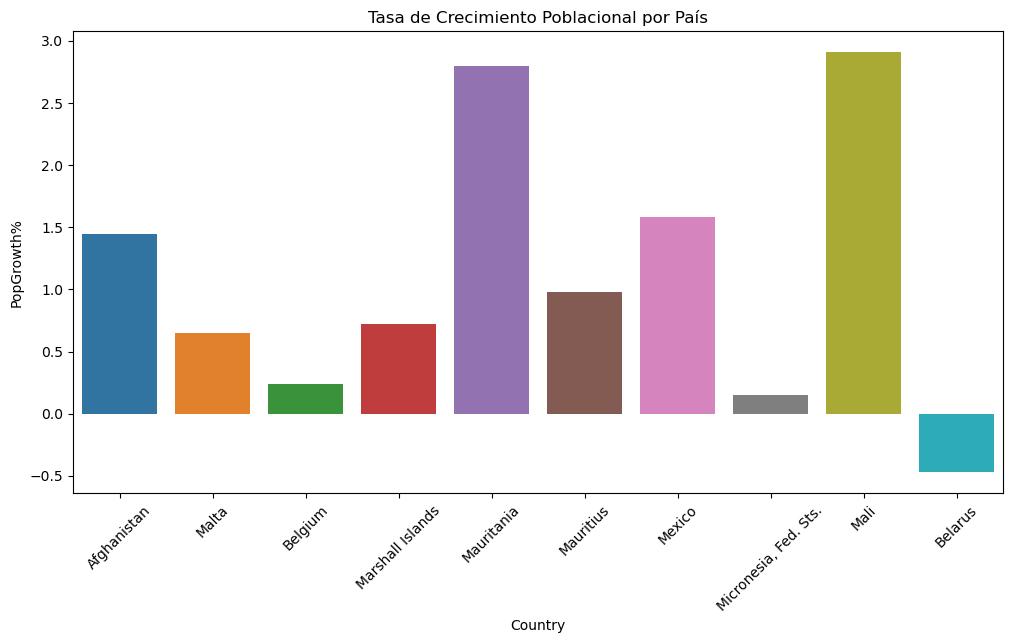

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='PopGrowth%', data=df.head(10))
plt.title('Tasa de Crecimiento Poblacional por País')
plt.xticks(rotation=45)
plt.show()


